In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader
import torchvision.datasets as datasets
import torchvision.transforms as transforms

In [ ]:
transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5,),(0.5,))])

In [ ]:
train_set = datasets.MNIST(root = './',train = True , download = True , transform = transform)
train_data_set_loader = torch.utils.data.DataLoader(train_set,batch_size = 128,shuffle = True)

test_set = datasets.MNIST(root = './',train = True , download = True, transform = transform)
test_data_set_loader = torch.utils.data.DataLoader(test_set,batch_size = 128,shuffle = True)


Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw




Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw

Processing...
Done!


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:502: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:143.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [ ]:
dummy_iter = iter(train_data_set_loader)


torch.Size([128, 1, 28, 28])
torch.Size([128])


In [ ]:
class auto_encoder(nn.Module) :

  def __init__(self) :
    super(auto_encoder, self).__init__()

    self.enc1 = nn.Linear(in_features = 784 , out_features = 512)
    self.enc2 = nn.Linear(in_features = 512, out_features= 256)
    self.enc3 = nn.Linear(in_features = 256,out_features = 128)
    self.enc4 = nn.Linear(in_features = 128,out_features = 64)
    #self.enc5 = nn.Linear(in_features = 64, out_features = 32)

    #self.dec0  = nn.Linear(in_features = 32, out_features = 64)
    self.dec1 = nn.Linear(in_features = 64, out_features = 128)
    self.dec2 = nn.Linear(in_features = 128 , out_features = 256)
    self.dec3 = nn.Linear(in_features = 256,out_features = 512)
    self.dec4 = nn.Linear(in_features = 512, out_features = 784)
  
  def forward(self,x) :

    x = F.relu(self.enc1(x))
    x = F.relu(self.enc2(x))
    x = F.relu(self.enc3(x))
    x = F.relu(self.enc4(x))
    #x = F.relu(self.enc5(x))

    #x = F.relu(self.dec0(x))
    x = F.relu(self.dec1(x))
    x = F.relu(self.dec2(x))
    x = F.relu(self.dec3(x))
    x = F.relu(self.dec4(x))

    return x



In [ ]:
model1 = auto_encoder().to("cuda")

criterion = nn.MSELoss()
optimizer = optim.RMSprop(model1.parameters(),lr = 0.001)

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device = torch.device(device)

In [ ]:
model_1_loss = []
model_1_epochs = []

for epoch in range(15):
  running_loss = 0.0
  for data in train_data_set_loader:
    img, _ = data
    img = img.to(device)
    img = img.view(img.size(0), -1)
    optimizer.zero_grad()
    outputs = model1(img)
    loss = criterion(outputs, img)
    loss.backward()
    optimizer.step()
    running_loss += loss.item()

    
    #train_loss.append(loss)
    #print('Epoch {} of {}, Train Loss: {:.3f}'.format(
  
  print("Epoch ",epoch,running_loss)
  model_1_loss.append(running_loss)
  model_1_epochs.append(epoch)
    

Epoch  0 433.99776941537857
Epoch  1 433.9973375201225
Epoch  2 433.99721693992615
Epoch  3 433.9970874786377
Epoch  4 433.997557759285
Epoch  5 433.9977089166641
Epoch  6 433.9984337091446
Epoch  7 433.9971754550934
Epoch  8 433.9970651268959
Epoch  9 433.9974145889282
Epoch  10 433.9978892803192
Epoch  11 433.99816685914993
Epoch  12 433.99753880500793
Epoch  13 433.99801421165466
Epoch  14 433.99769699573517


In [ ]:
import matplotlib.pyplot as plt
import numpy
def view_image(x) :

  #print(type(x))
  #print(x.shape)

  x = x.reshape(x.shape[0],1,28,28)
  """
  dataiter=iter(test_loader)
  orig_img,label=dataiter.next()
  plt.imshow(orig_img[0].squeeze(0).cpu().numpy(),cmap='gray')
  """
  plt.figure()
  plt.imshow(x[0].squeeze(0).cpu().detach().numpy(),cmap = 'gray')


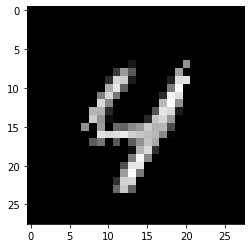

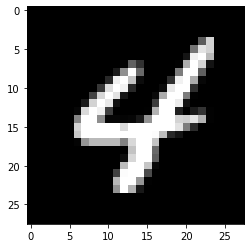

In [ ]:
for batch in test_data_set_loader :

  img,_ = batch
  img = img.to(device)
  img = img.view(img.size(0),-1)
  outputs = model1(img)
  view_image(outputs)
  view_image(img)
  break




In [ ]:
model2 = auto_encoder().to("cuda")

criterion = nn.MSELoss()
optimizer = optim.SGD(model2.parameters(),lr = 0.001)

In [ ]:
model_2_epochs = []
model_2_loss = []

for epoch in range(20):
  running_loss = 0.0
  for data in train_data_set_loader:
    img, _ = data
    img = img.to(device)
    img = img.view(img.size(0), -1)
    optimizer.zero_grad()
    outputs = model2(img)
    loss = criterion(outputs, img)
    loss.backward()
    optimizer.step()
    running_loss += loss.item()


    #train_loss.append(loss)
    #print('Epoch {} of {}, Train Loss: {:.3f}'.format(
  
  print("Epoch ",epoch,running_loss)
  model_2_epochs.append(epoch)
  model_2_loss.append(running_loss)

Epoch  0 434.9114736318588
Epoch  1 434.8153250217438
Epoch  2 434.72986936569214
Epoch  3 434.6544748544693
Epoch  4 434.58820021152496
Epoch  5 434.53210085630417
Epoch  6 434.48579555749893
Epoch  7 434.44626158475876
Epoch  8 434.4117149710655
Epoch  9 434.37988752126694
Epoch  10 434.3531618118286
Epoch  11 434.3293847441673
Epoch  12 434.3101904988289
Epoch  13 434.2936062812805
Epoch  14 434.2778522968292
Epoch  15 434.26298439502716
Epoch  16 434.24727511405945
Epoch  17 434.232428252697
Epoch  18 434.21781355142593
Epoch  19 434.2051331400871


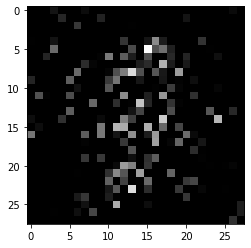

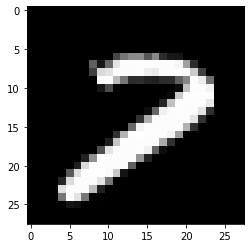

In [ ]:
for batch in test_data_set_loader :

  img,_ = batch
  img = img.to(device)
  img = img.view(img.size(0),-1)
  outputs = model2(img)
  view_image(outputs)
  view_image(img)
  break


In [ ]:
model3 = auto_encoder().to("cuda")

criterion = nn.MSELoss()
optimizer = optim.SGD(model3.parameters(),lr = 0.001,momentum = 0.9)

In [ ]:
model_3_epochs = []
model_3_loss = []
for epoch in range(20):
  running_loss = 0.0
  for data in train_data_set_loader:
    img, _ = data
    img = img.to(device)
    img = img.view(img.size(0), -1)
    optimizer.zero_grad()
    outputs = model3(img)
    loss = criterion(outputs, img)
    loss.backward()
    optimizer.step()
    running_loss += loss.item()

    
    #train_loss.append(loss)
    #print('Epoch {} of {}, Train Loss: {:.3f}'.format(
  
  print("Epoch ",epoch,running_loss)
  model_3_epochs.append(epoch)
  model_3_loss.append(running_loss)

Epoch  0 439.66586124897003
Epoch  1 436.1441997885704
Epoch  2 434.73026633262634
Epoch  3 434.2917600274086
Epoch  4 434.1624436378479
Epoch  5 434.1050024032593
Epoch  6 434.0740016102791
Epoch  7 434.0554302930832
Epoch  8 434.04270482063293
Epoch  9 434.03533351421356
Epoch  10 434.02772986888885
Epoch  11 434.02188766002655
Epoch  12 434.0167616009712
Epoch  13 434.01264703273773
Epoch  14 434.008292555809
Epoch  15 434.0061579942703
Epoch  16 434.00314354896545
Epoch  17 434.00129771232605
Epoch  18 433.99758303165436
Epoch  19 433.99616581201553


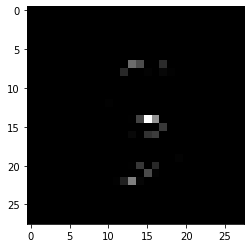

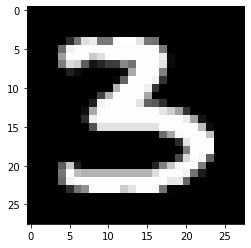

In [ ]:
for batch in test_data_set_loader :

  img,_ = batch
  img = img.to(device)
  img = img.view(img.size(0),-1)
  outputs = model3(img)
  view_image(outputs)
  view_image(img)
  break

In [ ]:
model4 = auto_encoder().to("cuda")

criterion = nn.MSELoss()
optimizer = optim.Adam(model4.parameters(),lr = 0.001)

In [ ]:
model_4_epochs = []
model_4_loss = []
for epoch in range(20):
  running_loss = 0.0
  for data in train_data_set_loader:
    img, _ = data
    img = img.to(device)
    img = img.view(img.size(0), -1)
    optimizer.zero_grad()
    outputs = model4(img)
    loss = criterion(outputs, img)
    loss.backward()
    optimizer.step()
    running_loss += loss.item()

    
    #train_loss.append(loss)
    #print('Epoch {} of {}, Train Loss: {:.3f}'.format(
  
  print("Epoch ",epoch,running_loss)
  model_4_epochs.append(epoch)
  model_4_loss.append(running_loss)

Epoch  0 431.10153675079346
Epoch  1 425.02381324768066
Epoch  2 421.65350115299225
Epoch  3 419.7848287820816
Epoch  4 418.7391421198845
Epoch  5 418.29220604896545
Epoch  6 417.8468698859215
Epoch  7 417.3276945948601
Epoch  8 416.8867509961128
Epoch  9 416.52699077129364
Epoch  10 416.3026255965233
Epoch  11 416.0941796898842
Epoch  12 415.7432098388672
Epoch  13 415.50132489204407
Epoch  14 415.3839707374573
Epoch  15 415.2767137289047
Epoch  16 415.18396401405334
Epoch  17 415.09225183725357
Epoch  18 415.0081262588501
Epoch  19 414.89018338918686


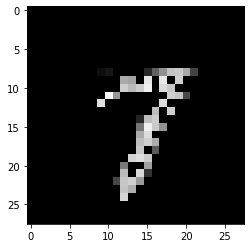

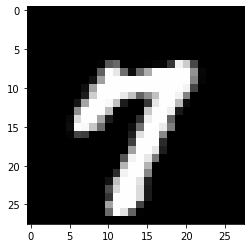

In [ ]:
for batch in test_data_set_loader :

  img,_ = batch
  img = img.to(device)
  img = img.view(img.size(0),-1)
  outputs = model4(img)
  view_image(outputs)
  view_image(img)
  break

All the above code I have experimented with all different optimizers. Now I will plot the data for train loss vs epochs and testing loss

In [ ]:
import matplotlib.pyplot as plt

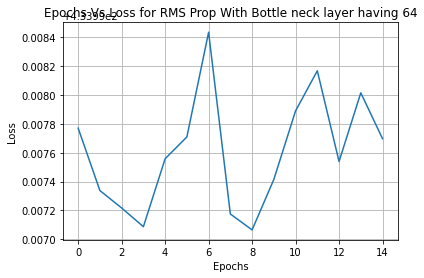

In [ ]:
plt.plot(model_1_epochs,model_1_loss)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.grid()
plt.title("Epochs Vs Loss for RMS Prop With Bottle neck layer having 64")
plt.show()

In [ ]:
running_loss = 0
for data in test_data_set_loader :
  img, _ = data
  img = img.to(device)
  img = img.view(img.size(0),-1)
  outputs = model1(img)
  loss = criterion(outputs,img)
  running_loss = running_loss + loss.item()

print("Testing Loss for RMS prop having 64 neurons as bottle neck layer ",running_loss)

Testing Loss for RMS prop having 64 neurons as bottle neck layer  433.99797397851944


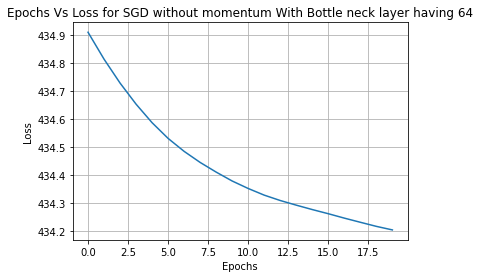

In [ ]:
plt.plot(model_2_epochs,model_2_loss)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.grid()
plt.title("Epochs Vs Loss for SGD without momentum With Bottle neck layer having 64")
plt.show()

In [ ]:
running_loss = 0
for data in test_data_set_loader :
  img, _ = data
  img = img.to(device)
  img = img.view(img.size(0),-1)
  outputs = model2(img)
  loss = criterion(outputs,img)
  running_loss = running_loss + loss.item()

print("Testing Loss for SGD without momentum having 64 neurons as bottle neck layer ",running_loss)

Testing Loss for SGD without momentum having 64 neurons as bottle neck layer  434.19726753234863


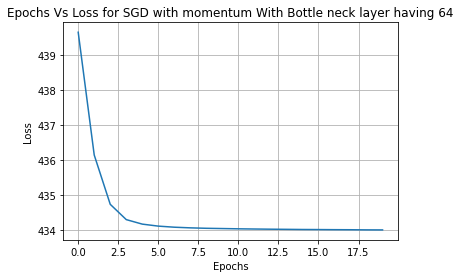

In [ ]:
plt.plot(model_3_epochs,model_3_loss)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.grid()
plt.title("Epochs Vs Loss for SGD with momentum With Bottle neck layer having 64")
plt.show()

In [ ]:
running_loss = 0
for data in test_data_set_loader :
  img, _ = data
  img = img.to(device)
  img = img.view(img.size(0),-1)
  outputs = model3(img)
  loss = criterion(outputs,img)
  running_loss = running_loss + loss.item()

print("Testing Loss for SGD with momentum having 64 neurons as bottle neck layer ",running_loss)

Testing Loss for SGD with momentum having 64 neurons as bottle neck layer  433.9965450167656


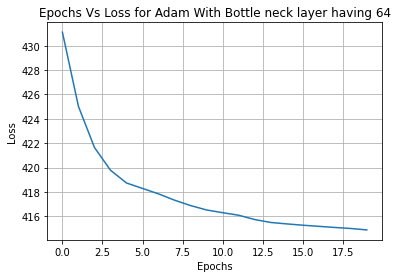

In [ ]:
plt.plot(model_4_epochs,model_4_loss)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.grid()
plt.title("Epochs Vs Loss for Adam With Bottle neck layer having 64")
plt.show()

In [ ]:
running_loss = 0
for data in test_data_set_loader :
  img, _ = data
  img = img.to(device)
  img = img.view(img.size(0),-1)
  outputs = model4(img)
  loss = criterion(outputs,img)
  running_loss = running_loss + loss.item()

print("Testing Loss for Adam having 64 neurons as bottle neck layer ",running_loss)

Testing Loss for Adam having 64 neurons as bottle neck layer  414.7844918370247


Test Reconstruction Loss vs Hidden Layers

Here I'm experimenting with 128 , 64 and 32 hidden layers

In [ ]:
class auto_encoder_2(nn.Module) :

  def __init__(self) :
    super(auto_encoder_2, self).__init__()

    self.enc1 = nn.Linear(in_features = 784 , out_features = 512)
    self.enc2 = nn.Linear(in_features = 512, out_features= 256)
    self.enc3 = nn.Linear(in_features = 256,out_features = 128)
    #self.enc4 = nn.Linear(in_features = 128,out_features = 64)
    #self.enc5 = nn.Linear(in_features = 64, out_features = 32)

    #self.dec0  = nn.Linear(in_features = 32, out_features = 64)
    #self.dec1 = nn.Linear(in_features = 64, out_features = 128)
    self.dec2 = nn.Linear(in_features = 128 , out_features = 256)
    self.dec3 = nn.Linear(in_features = 256,out_features = 512)
    self.dec4 = nn.Linear(in_features = 512, out_features = 784)
  
  def forward(self,x) :

    x = F.relu(self.enc1(x))
    x = F.relu(self.enc2(x))
    x = F.relu(self.enc3(x))
    #x = F.relu(self.enc4(x))
    #x = F.relu(self.enc5(x))

    #x = F.relu(self.dec0(x))
    #x = F.relu(self.dec1(x))
    x = F.relu(self.dec2(x))
    x = F.relu(self.dec3(x))
    x = F.relu(self.dec4(x))

    return x


In [ ]:
class auto_encoder_3(nn.Module) :

  def __init__(self) :
    super(auto_encoder_3, self).__init__()

    self.enc1 = nn.Linear(in_features = 784 , out_features = 512)
    self.enc2 = nn.Linear(in_features = 512, out_features= 256)
    self.enc3 = nn.Linear(in_features = 256,out_features = 128)
    self.enc4 = nn.Linear(in_features = 128,out_features = 64)
    self.enc5 = nn.Linear(in_features = 64, out_features = 32)

    self.dec0  = nn.Linear(in_features = 32, out_features = 64)
    self.dec1 = nn.Linear(in_features = 64, out_features = 128)
    self.dec2 = nn.Linear(in_features = 128 , out_features = 256)
    self.dec3 = nn.Linear(in_features = 256,out_features = 512)
    self.dec4 = nn.Linear(in_features = 512, out_features = 784)
  
  def forward(self,x) :

    x = F.relu(self.enc1(x))
    x = F.relu(self.enc2(x))
    x = F.relu(self.enc3(x))
    x = F.relu(self.enc4(x))
    x = F.relu(self.enc5(x))

    x = F.relu(self.dec0(x))
    x = F.relu(self.dec1(x))
    x = F.relu(self.dec2(x))
    x = F.relu(self.dec3(x))
    x = F.relu(self.dec4(x))

    return x


In [ ]:
model21 = auto_encoder_2().to("cuda")

criterion = nn.MSELoss()
optimizer = optim.RMSprop(model21.parameters(),lr = 0.001)

In [ ]:
for epoch in range(20):
  running_loss = 0.0
  for data in train_data_set_loader:
    img, _ = data
    img = img.to(device)
    img = img.view(img.size(0), -1)
    optimizer.zero_grad()
    outputs = model21(img)
    loss = criterion(outputs, img)
    loss.backward()
    optimizer.step()
    running_loss += loss.item()

    
    #train_loss.append(loss)
    #print('Epoch {} of {}, Train Loss: {:.3f}'.format(
  
  print("Epoch ",epoch,running_loss)

Epoch  0 407.7051256299019
Epoch  1 407.5408955812454
Epoch  2 407.4320076704025
Epoch  3 407.35128051042557
Epoch  4 407.24021220207214
Epoch  5 407.10639667510986
Epoch  6 406.91533809900284
Epoch  7 406.79366904497147
Epoch  8 406.60421949625015
Epoch  9 406.52894055843353
Epoch  10 406.45897978544235
Epoch  11 406.4038916826248
Epoch  12 406.3644369840622
Epoch  13 406.3030784726143
Epoch  14 406.1123883128166
Epoch  15 405.9897230267525
Epoch  16 405.9489847421646
Epoch  17 405.9072692990303
Epoch  18 405.8704621195793
Epoch  19 405.8226282596588


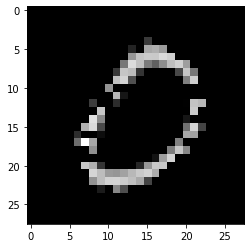

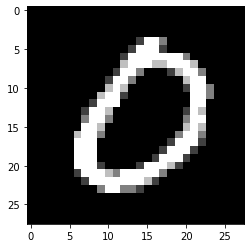

In [ ]:
for batch in test_data_set_loader :

  img,_ = batch
  img = img.to(device)
  img = img.view(img.size(0),-1)
  outputs = model21(img)
  view_image(outputs)
  view_image(img)
  break


In [ ]:
running_loss = 0
for data in test_data_set_loader :
  img, _ = data
  img = img.to(device)
  img = img.view(img.size(0),-1)
  outputs = model21(img)
  loss = criterion(outputs,img)
  running_loss = running_loss + loss.item()

print("Testing Loss for RMS prop having 128 neurons as bottle neck layer ",running_loss)

Testing Loss for RMS prop having 128 neurons as bottle neck layer  405.63596642017365


In [ ]:
# i have observed that the above model has the best accuracy and lower testing loss and retains the image pretty well . 
# so saving the model 
torch.save(model21,'best-autoencoder.pt')

In [ ]:
model22 = auto_encoder_3().to("cuda")

criterion = nn.MSELoss()
optimizer = optim.RMSprop(model22.parameters(),lr = 0.001)

In [ ]:
for epoch in range(20):
  running_loss = 0.0
  for data in train_data_set_loader:
    img, _ = data
    img = img.to(device)
    img = img.view(img.size(0), -1)
    optimizer.zero_grad()
    outputs = model22(img)
    loss = criterion(outputs, img)
    loss.backward()
    optimizer.step()
    running_loss += loss.item()

    
    #train_loss.append(loss)
    #print('Epoch {} of {}, Train Loss: {:.3f}'.format(
  
  print("Epoch ",epoch,running_loss)

Epoch  0 432.9527468085289
Epoch  1 431.11652314662933
Epoch  2 427.5318866968155
Epoch  3 423.0249465703964
Epoch  4 420.1339740753174
Epoch  5 418.05766463279724
Epoch  6 416.6640092730522
Epoch  7 415.37680876255035
Epoch  8 414.3075094819069
Epoch  9 413.2808686494827
Epoch  10 412.59713476896286
Epoch  11 412.1298528909683
Epoch  12 411.78679317235947
Epoch  13 411.32381969690323
Epoch  14 411.00368988513947
Epoch  15 410.668397128582
Epoch  16 410.46243208646774
Epoch  17 410.25806671380997
Epoch  18 410.0886157155037
Epoch  19 409.965901017189


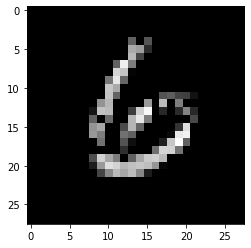

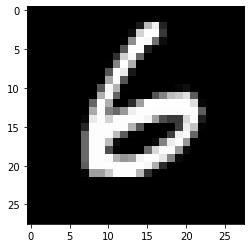

In [ ]:
for batch in test_data_set_loader :

  img,_ = batch
  img = img.to(device)
  img = img.view(img.size(0),-1)
  outputs = model22(img)
  view_image(outputs)
  view_image(img)
  break

In [ ]:
running_loss = 0
for data in test_data_set_loader :
  img, _ = data
  img = img.to(device)
  img = img.view(img.size(0),-1)
  outputs = model22(img)
  loss = criterion(outputs,img)
  running_loss = running_loss + loss.item()

print("Testing Loss for RMS prop having 32 neurons as bottle neck layer ",running_loss)

Testing Loss for RMS prop having 32 neurons as bottle neck layer  409.6453216075897


In [ ]:
from tabulate import tabulate

In [ ]:
print(tabulate([['32','409.645'],['64','433.697'],['128','405.635']], headers=['Bottle Neck Size','Testing Reconstruction Loss (RMS prop)'], tablefmt='orgtbl'))

|   Bottle Neck Size |   Testing Reconstruction Loss (RMS prop) |
|--------------------+------------------------------------------|
|                 32 |                                  409.645 |
|                 64 |                                  433.697 |
|                128 |                                  405.635 |


In [ ]:
model31 = auto_encoder_2().to("cuda")

criterion = nn.MSELoss()
optimizer = optim.SGD(model31.parameters(),lr = 0.001)

In [ ]:
for epoch in range(20):
  running_loss = 0.0
  for data in train_data_set_loader:
    img, _ = data
    img = img.to(device)
    img = img.view(img.size(0), -1)
    optimizer.zero_grad()
    outputs = model31(img)
    loss = criterion(outputs, img)
    loss.backward()
    optimizer.step()
    running_loss += loss.item()

    
    #train_loss.append(loss)
    #print('Epoch {} of {}, Train Loss: {:.3f}'.format(
  
  print("Epoch ",epoch,running_loss)

Epoch  0 442.9731856584549
Epoch  1 442.2748391032219
Epoch  2 441.60988450050354
Epoch  3 440.9786775112152
Epoch  4 440.3838058710098
Epoch  5 439.8249109983444
Epoch  6 439.30412179231644
Epoch  7 438.823588013649
Epoch  8 438.38288456201553
Epoch  9 437.98088532686234
Epoch  10 437.6144286394119
Epoch  11 437.27977311611176
Epoch  12 436.9733861684799
Epoch  13 436.69159030914307
Epoch  14 436.4342991113663
Epoch  15 436.1987469792366
Epoch  16 435.98380798101425
Epoch  17 435.78567534685135
Epoch  18 435.6008388400078
Epoch  19 435.4339487552643


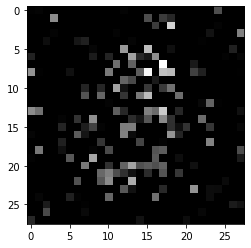

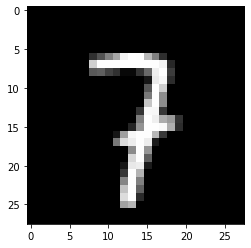

In [ ]:
for batch in test_data_set_loader :

  img,_ = batch
  img = img.to(device)
  img = img.view(img.size(0),-1)
  outputs = model31(img)
  view_image(outputs)
  view_image(img)
  break

In [ ]:
running_loss = 0
for data in test_data_set_loader :
  img, _ = data
  img = img.to(device)
  img = img.view(img.size(0),-1)
  outputs = model31(img)
  loss = criterion(outputs,img)
  running_loss = running_loss + loss.item()

print("Testing Loss for SGD without momentum having 128 neurons as bottle neck layer ",running_loss)

Testing Loss for SGD without momentum having 128 neurons as bottle neck layer  435.35438990592957


In [ ]:
model32 = auto_encoder_3().to("cuda")

criterion = nn.MSELoss()
optimizer = optim.SGD(model32.parameters(),lr = 0.001)

In [ ]:
for epoch in range(20):
  running_loss = 0.0
  for data in train_data_set_loader:
    img, _ = data
    img = img.to(device)
    img = img.view(img.size(0), -1)
    optimizer.zero_grad()
    outputs = model32(img)
    loss = criterion(outputs, img)
    loss.backward()
    optimizer.step()
    running_loss += loss.item()

    
    #train_loss.append(loss)
    #print('Epoch {} of {}, Train Loss: {:.3f}'.format(
  
  print("Epoch ",epoch,running_loss)

Epoch  0 441.50763458013535
Epoch  1 440.92384099960327
Epoch  2 440.37250578403473
Epoch  3 439.8474484682083
Epoch  4 439.34980565309525
Epoch  5 438.8846764564514
Epoch  6 438.45336443185806
Epoch  7 438.04932552576065
Epoch  8 437.66925370693207
Epoch  9 437.3240941762924
Epoch  10 437.00610089302063
Epoch  11 436.7091974020004
Epoch  12 436.4366679787636
Epoch  13 436.18565368652344
Epoch  14 435.9550818800926
Epoch  15 435.7491455078125
Epoch  16 435.56506901979446
Epoch  17 435.3956337571144
Epoch  18 435.2375949025154
Epoch  19 435.09386640787125


In [ ]:
running_loss = 0
for data in test_data_set_loader :
  img, _ = data
  img = img.to(device)
  img = img.view(img.size(0),-1)
  outputs = model32(img)
  loss = criterion(outputs,img)
  running_loss = running_loss + loss.item()

print("Testing Loss for SGD without momentum having 32 neurons as bottle neck layer ",running_loss)

Testing Loss for SGD without momentum having 32 neurons as bottle neck layer  435.02679485082626


In [ ]:
print(tabulate([['32','435.026'],['64','434.197'],['128','435.355']], headers=['Bottle Neck Size','Testing Reconstruction Loss(SGD without momentum)'], tablefmt='orgtbl'))

|   Bottle Neck Size |   Testing Reconstruction Loss(SGD without momentum) |
|--------------------+-----------------------------------------------------|
|                 32 |                                             435.026 |
|                 64 |                                             434.197 |
|                128 |                                             435.355 |


In [ ]:
model41 = auto_encoder_2().to("cuda")

criterion = nn.MSELoss()
optimizer = optim.SGD(model41.parameters(),lr = 0.001,momentum = 0.9)

In [ ]:
for epoch in range(20):
  running_loss = 0.0
  for data in train_data_set_loader:
    img, _ = data
    img = img.to(device)
    img = img.view(img.size(0), -1)
    optimizer.zero_grad()
    outputs = model41(img)
    loss = criterion(outputs, img)
    loss.backward()
    optimizer.step()
    running_loss += loss.item()

    
    #train_loss.append(loss)
    #print('Epoch {} of {}, Train Loss: {:.3f}'.format(
  
  print("Epoch ",epoch,running_loss)

Epoch  0 440.51528853178024
Epoch  1 436.668938934803
Epoch  2 434.9419661164284
Epoch  3 434.33368796110153
Epoch  4 434.1751364469528
Epoch  5 434.11075031757355
Epoch  6 434.0721253156662
Epoch  7 434.04618149995804
Epoch  8 434.0301843881607
Epoch  9 434.020000398159
Epoch  10 434.0100390315056
Epoch  11 434.00538140535355
Epoch  12 434.0005087852478
Epoch  13 433.9971252679825
Epoch  14 433.99625140428543
Epoch  15 433.9937441945076
Epoch  16 433.9922456741333
Epoch  17 433.9904845356941
Epoch  18 433.98972326517105
Epoch  19 433.98767828941345


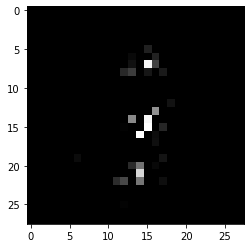

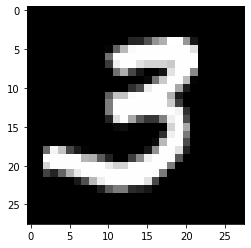

In [ ]:
for batch in test_data_set_loader :

  img,_ = batch
  img = img.to(device)
  img = img.view(img.size(0),-1)
  outputs = model41(img)
  view_image(outputs)
  view_image(img)
  break

In [ ]:
running_loss = 0
for data in test_data_set_loader :
  img, _ = data
  img = img.to(device)
  img = img.view(img.size(0),-1)
  outputs = model41(img)
  loss = criterion(outputs,img)
  running_loss = running_loss + loss.item()

print("Testing Loss for SGD with momentum having 128 neurons as bottle neck layer ",running_loss)

Testing Loss for SGD with momentum having 128 neurons as bottle neck layer  433.9865019917488


In [ ]:
model42 = auto_encoder_3().to("cuda")

criterion = nn.MSELoss()
optimizer = optim.SGD(model42.parameters(),lr = 0.001,momentum = 0.9)

In [ ]:
for epoch in range(20):
  running_loss = 0.0
  for data in train_data_set_loader:
    img, _ = data
    img = img.to(device)
    img = img.view(img.size(0), -1)
    optimizer.zero_grad()
    outputs = model42(img)
    loss = criterion(outputs, img)
    loss.backward()
    optimizer.step()
    running_loss += loss.item()

    
    #train_loss.append(loss)
    #print('Epoch {} of {}, Train Loss: {:.3f}'.format(
  
  print("Epoch ",epoch,running_loss)

Epoch  0 439.9401908516884
Epoch  1 436.2228890657425
Epoch  2 434.7361778616905
Epoch  3 434.2775526046753
Epoch  4 434.15725058317184
Epoch  5 434.1085497736931
Epoch  6 434.07714837789536
Epoch  7 434.05299228429794
Epoch  8 434.03902500867844
Epoch  9 434.02842247486115
Epoch  10 434.0198102593422
Epoch  11 434.0122279524803
Epoch  12 434.0056605935097
Epoch  13 433.99975872039795
Epoch  14 433.99586284160614
Epoch  15 433.99191784858704
Epoch  16 433.98939406871796
Epoch  17 433.98731929063797
Epoch  18 433.98627972602844
Epoch  19 433.9862340092659


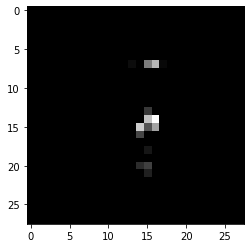

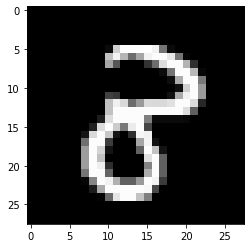

In [ ]:
for batch in test_data_set_loader :

  img,_ = batch
  img = img.to(device)
  img = img.view(img.size(0),-1)
  outputs = model42(img)
  view_image(outputs)
  view_image(img)
  break

In [ ]:
running_loss = 0
for data in test_data_set_loader :
  img, _ = data
  img = img.to(device)
  img = img.view(img.size(0),-1)
  outputs = model42(img)
  loss = criterion(outputs,img)
  running_loss = running_loss + loss.item()

print("Testing Loss for SGD with momentum having 32 neurons as bottle neck layer ",running_loss)

Testing Loss for SGD with momentum having 32 neurons as bottle neck layer  433.98521876335144


In [ ]:
print(tabulate([['32','433.985'],['64','433.996'],['128','433.986']], headers=['Bottle Neck Size','Testing Reconstruction Loss(SGD with momentum)'], tablefmt='orgtbl'))

|   Bottle Neck Size |   Testing Reconstruction Loss(SGD with momentum) |
|--------------------+--------------------------------------------------|
|                 32 |                                          433.985 |
|                 64 |                                          433.996 |
|                128 |                                          433.986 |


In [ ]:
model51 = auto_encoder_2().to("cuda")

criterion = nn.MSELoss()
optimizer = optim.Adam(model51.parameters(),lr = 0.001)

In [ ]:
for epoch in range(20):
  running_loss = 0.0
  for data in train_data_set_loader:
    img, _ = data
    img = img.to(device)
    img = img.view(img.size(0), -1)
    optimizer.zero_grad()
    outputs = model51(img)
    loss = criterion(outputs, img)
    loss.backward()
    optimizer.step()
    running_loss += loss.item()

    
    #train_loss.append(loss)
    #print('Epoch {} of {}, Train Loss: {:.3f}'.format(
  
  print("Epoch ",epoch,running_loss)

Epoch  0 430.1766105890274
Epoch  1 425.9217800498009
Epoch  2 424.37652909755707
Epoch  3 423.2488585114479
Epoch  4 422.3729073405266
Epoch  5 421.7910711169243
Epoch  6 421.20717638731
Epoch  7 420.74159938097
Epoch  8 420.6173644065857
Epoch  9 420.5287566781044
Epoch  10 420.438500225544
Epoch  11 420.2859081029892
Epoch  12 420.2408555150032
Epoch  13 420.18399184942245
Epoch  14 420.1507423520088
Epoch  15 419.97000873088837
Epoch  16 419.9074283838272
Epoch  17 419.8606627583504
Epoch  18 419.83536130189896
Epoch  19 419.80563819408417


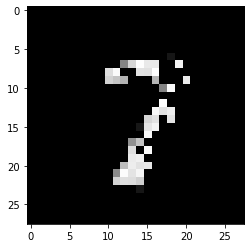

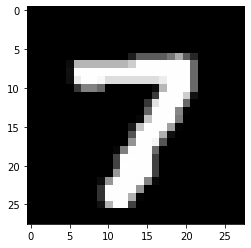

In [ ]:
for batch in test_data_set_loader :

  img,_ = batch
  img = img.to(device)
  img = img.view(img.size(0),-1)
  outputs = model51(img)
  view_image(outputs)
  view_image(img)
  break

In [ ]:
running_loss = 0
for data in test_data_set_loader :
  img, _ = data
  img = img.to(device)
  img = img.view(img.size(0),-1)
  outputs = model51(img)
  loss = criterion(outputs,img)
  running_loss = running_loss + loss.item()

print("Testing Loss for Adam having 128 neurons as bottle neck layer ",running_loss)

Testing Loss for Adam having 128 neurons as bottle neck layer  419.8095703125


In [ ]:
model52 = auto_encoder_3().to("cuda")

criterion = nn.MSELoss()
optimizer = optim.Adam(model52.parameters(),lr = 0.001)

In [ ]:
for epoch in range(20):
  running_loss = 0.0
  for data in train_data_set_loader:
    img, _ = data
    img = img.to(device)
    img = img.view(img.size(0), -1)
    optimizer.zero_grad()
    outputs = model52(img)
    loss = criterion(outputs, img)
    loss.backward()
    optimizer.step()
    running_loss += loss.item()

    
    #train_loss.append(loss)
    #print('Epoch {} of {}, Train Loss: {:.3f}'.format(
  
  print("Epoch ",epoch,running_loss)

Epoch  0 432.7828619480133
Epoch  1 429.3236634731293
Epoch  2 426.27739548683167
Epoch  3 423.52007937431335
Epoch  4 421.65848410129547
Epoch  5 420.76485389471054
Epoch  6 419.98998391628265
Epoch  7 419.59708189964294
Epoch  8 419.2881474494934
Epoch  9 418.9869920015335
Epoch  10 418.8116589784622
Epoch  11 418.5886886715889
Epoch  12 418.334185898304
Epoch  13 418.0789099931717
Epoch  14 417.9249443411827
Epoch  15 417.777890086174
Epoch  16 417.63860470056534
Epoch  17 417.5471992492676
Epoch  18 417.4318156838417
Epoch  19 417.34354335069656


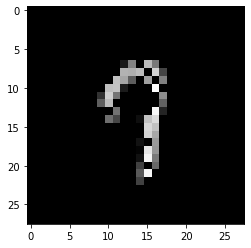

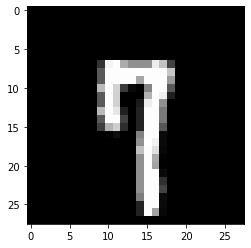

In [ ]:
for batch in test_data_set_loader :

  img,_ = batch
  img = img.to(device)
  img = img.view(img.size(0),-1)
  outputs = model52(img)
  view_image(outputs)
  view_image(img)
  break

In [ ]:
running_loss = 0
for data in test_data_set_loader :
  img, _ = data
  img = img.to(device)
  img = img.view(img.size(0),-1)
  outputs = model52(img)
  loss = criterion(outputs,img)
  running_loss = running_loss + loss.item()

print("Testing Loss for Adam having 32 neurons as bottle neck layer ",running_loss)

Testing Loss for Adam having 32 neurons as bottle neck layer  417.26873421669006


In [ ]:
print(tabulate([['32','417.268'],['64','414.784'],['128','419.809']], headers=['Bottle Neck Size','Testing Reconstruction Loss(Adam)'], tablefmt='orgtbl'))

|   Bottle Neck Size |   Testing Reconstruction Loss(Adam) |
|--------------------+-------------------------------------|
|                 32 |                             417.268 |
|                 64 |                             414.784 |
|                128 |                             419.809 |


PCA Reconstruction

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
import keras
from keras.datasets import mnist
import numpy as np

In [ ]:
(train_features,train_labels),(test_features,test_labels) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
train_features = np.reshape(train_features,(60000,784))
test_features = np.reshape(test_features,(10000,784))

train_features = train_features/255
test_features = test_features/255

In [ ]:
pca_128 = PCA(128)
pca_128.fit(train_features)
train_features_128 = pca_128.transform(train_features)
test_features_128 = pca_128.transform(test_features)

In [ ]:
test_features_128_inverse = pca_128.inverse_transform(test_features_128)

In [ ]:
print(test_features_128_inverse.shape)

(10000, 784)


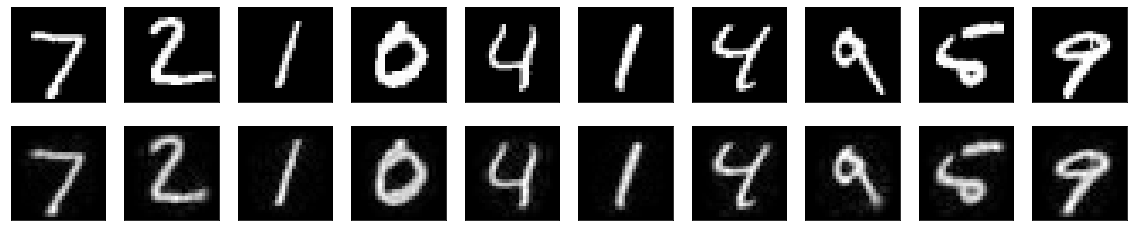

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,4))

for i in range(10) :

  ax = plt.subplot(2,10,i+1)
  plt.imshow(test_features[i].reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)


  ax = plt.subplot(2,10,i+1+10)
  plt.imshow(np.abs(test_features_128_inverse[i]).reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

plt.show()

In [ ]:
pca_64 = PCA(64)
pca_64.fit(train_features)
train_features_64 = pca_64.transform(train_features)
test_features_64 = pca_64.transform(test_features)
test_features_64_inverse = pca_64.inverse_transform(test_features_64)

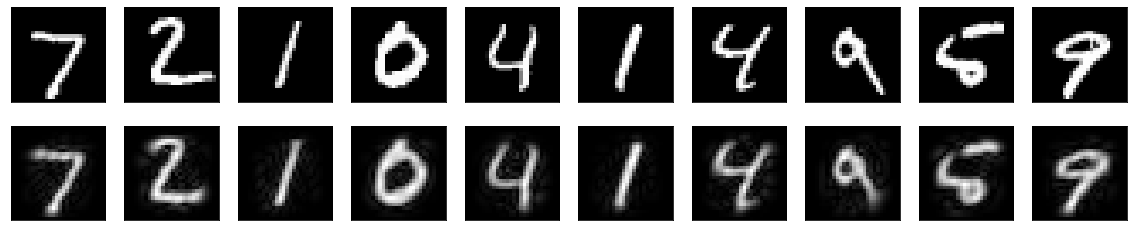

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,4))

for i in range(10) :

  ax = plt.subplot(2,10,i+1)
  plt.imshow(test_features[i].reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)


  ax = plt.subplot(2,10,i+1+10)
  plt.imshow(np.abs(test_features_64_inverse[i]).reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

plt.show()

In [ ]:
pca_32 = PCA(32)
pca_32.fit(train_features)
train_features_32 = pca_32.transform(train_features)
test_features_32 = pca_32.transform(test_features)
test_features_32_inverse = pca_32.inverse_transform(test_features_32)

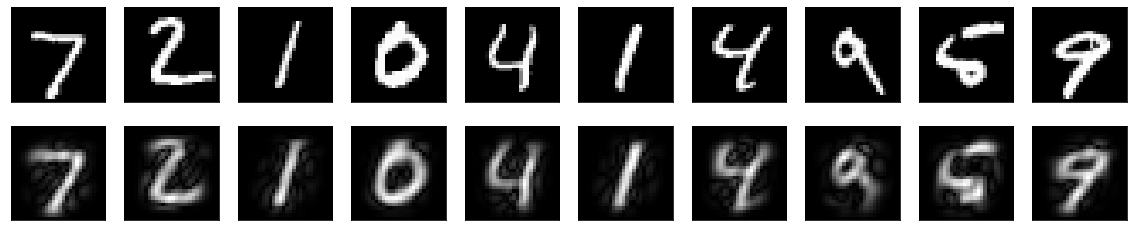

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,4))

for i in range(10) :

  ax = plt.subplot(2,10,i+1)
  plt.imshow(test_features[i].reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)


  ax = plt.subplot(2,10,i+1+10)
  plt.imshow(np.abs(test_features_32_inverse[i]).reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

plt.show()

In [ ]:
pca_16 = PCA(16)
pca_16.fit(train_features)
train_features_16 = pca_16.transform(train_features)
test_features_16 = pca_16.transform(test_features)
test_features_16_inverse = pca_16.inverse_transform(test_features_16)

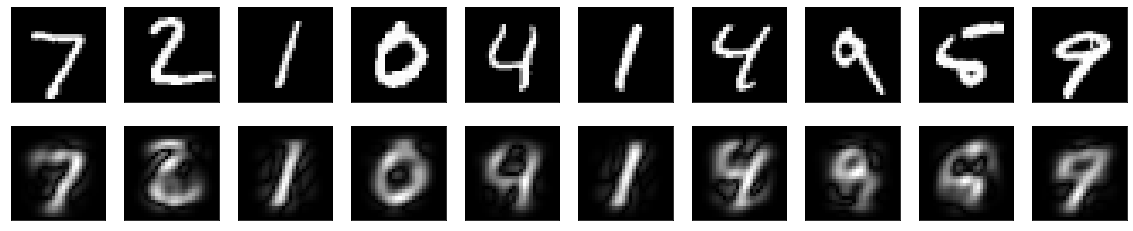

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,4))

for i in range(10) :

  ax = plt.subplot(2,10,i+1)
  plt.imshow(test_features[i].reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)


  ax = plt.subplot(2,10,i+1+10)
  plt.imshow(np.abs(test_features_16_inverse[i]).reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

plt.show()

As we can see having 16 features cannot retrace the image back. So we can use 32 features , while 128 retains most of the information.